### Naive Bayes Classifier Task
### 문장에서 악플인지 아닌지 구분
##### 이중 분류(Multiclass Classification)

In [1]:
import pandas as pd
import csv
bd_words_df =pd.read_csv('./datasets/Dataset.csv',sep='\t')
bd_words_df

,댓글,악플여부
0,이종석 한효주 나오는 드라마 이후로 드라마 안봤다. 2년전인가?? 좀 신선했었지. ...,0.0
1,씨바알..노무노무 술프노... 오늘 저녁은 꽂등심이다ㅠㅜ,0.0
2,짱깨 꺼라ㅡ패쓰,0.0
3,그들의 사생활 ~ 고인이된 설리를 위해서라도 모두 조용하길 지금 누굴 탓한다고 무슨...,1.0
4,아무리 법이 뭣같아도 무슨 자격으로 개인의 신상정보를 불특정 다수에게 공개하는지 도...,1.0
...,...,...
9995,이거 보다 더한 막장의 드라마도 넋놓고 보면서 무슨?,1.0
9996,머...제네시스..올라프에디션?,1.0
9997,항상 여자로 ㅡ ㅡ 저지랄 들이야 남자들 벗겨봐라,0.0
9998,첫번째 이유가 ㄹㅇ 맞지특히나 뉴스나 기사 몇줄읽은 학생들끼리 대화해도 서로 존나 ...,0.0


## 1. 데이터 분석

In [2]:
#중복행 제거
bd_words_df.duplicated().sum()
bd_words_df = bd_words_df.drop_duplicates().reset_index(drop=True)
bd_words_df

,댓글,악플여부
0,이종석 한효주 나오는 드라마 이후로 드라마 안봤다. 2년전인가?? 좀 신선했었지. ...,0.0
1,씨바알..노무노무 술프노... 오늘 저녁은 꽂등심이다ㅠㅜ,0.0
2,짱깨 꺼라ㅡ패쓰,0.0
3,그들의 사생활 ~ 고인이된 설리를 위해서라도 모두 조용하길 지금 누굴 탓한다고 무슨...,1.0
4,아무리 법이 뭣같아도 무슨 자격으로 개인의 신상정보를 불특정 다수에게 공개하는지 도...,1.0
...,...,...
9982,이거 보다 더한 막장의 드라마도 넋놓고 보면서 무슨?,1.0
9983,머...제네시스..올라프에디션?,1.0
9984,항상 여자로 ㅡ ㅡ 저지랄 들이야 남자들 벗겨봐라,0.0
9985,첫번째 이유가 ㄹㅇ 맞지특히나 뉴스나 기사 몇줄읽은 학생들끼리 대화해도 서로 존나 ...,0.0


In [3]:
#결측치 제거
bd_words_df['악플여부'].isna().sum()
bd_words_df = bd_words_df.dropna(subset="악플여부").reset_index(drop=True)
bd_words_df

,댓글,악플여부
0,이종석 한효주 나오는 드라마 이후로 드라마 안봤다. 2년전인가?? 좀 신선했었지. ...,0.0
1,씨바알..노무노무 술프노... 오늘 저녁은 꽂등심이다ㅠㅜ,0.0
2,짱깨 꺼라ㅡ패쓰,0.0
3,그들의 사생활 ~ 고인이된 설리를 위해서라도 모두 조용하길 지금 누굴 탓한다고 무슨...,1.0
4,아무리 법이 뭣같아도 무슨 자격으로 개인의 신상정보를 불특정 다수에게 공개하는지 도...,1.0
...,...,...
9957,이거 보다 더한 막장의 드라마도 넋놓고 보면서 무슨?,1.0
9958,머...제네시스..올라프에디션?,1.0
9959,항상 여자로 ㅡ ㅡ 저지랄 들이야 남자들 벗겨봐라,0.0
9960,첫번째 이유가 ㄹㅇ 맞지특히나 뉴스나 기사 몇줄읽은 학생들끼리 대화해도 서로 존나 ...,0.0


In [4]:
#타겟 분포 확인
bd_words_df["악플여부"].value_counts()

악플여부
1.0    4988
0.0    4974
Name: count, dtype: int64

In [5]:
#데이터셋 분리
from sklearn.model_selection import train_test_split
features = bd_words_df.iloc[:,0]
targets = bd_words_df.iloc[:,1]

X_train,X_test,y_train,y_test = train_test_split(features,targets,stratify=targets,random_state=60,test_size=0.1)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

countVectorizer = CountVectorizer()

navie_bayes_pipeline = Pipeline([('count_vectorizer', CountVectorizer()), ('naive_bayes', MultinomialNB())])
navie_bayes_pipeline.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('naive_bayes', MultinomialNB())])

In [7]:
y_pred = navie_bayes_pipeline.predict(X_test)
print(X_test.index)
bd_df_test = bd_words_df.loc[X_test.index]
bd_df_test["y_pred"] = y_pred
bd_df_test
bd_df_test[bd_df_test["악플여부"]==bd_df_test["y_pred"]]

# navie_bayes_pipeline.score(X_test, y_test)

Index([3744, 1019, 4961, 4665, 4424,  754,  898, 8652, 9345, 4714,
       ...
       2801, 8396, 1688, 7213, 3506, 4314, 2672, 6027, 2611, 5127],
      dtype='int64', length=997)


,댓글,악플여부,y_pred
1019,에휴 사람들은 기사가 나와서 그걸 이야기 하는데 법적조치라니 이젠 무슨 기사가떠도 ...,1.0,1.0
4665,김원희씨~테클걸려는건 아니지만 남편분께서 그렇게 하실지 의문이네요.그래도 본인아이 ...,1.0,1.0
4424,싼티 줄줄,0.0,0.0
754,어제 너무 재밌으시던데요! 잘 봤어요ㅋㅋ뉴스에서 계속 볼 수 있으면 좋겠어요~~,1.0,1.0
898,ㅋㅋㅋ댄싱머신인줄,1.0,1.0
...,...,...,...
4314,엽문시발 걍 짱깨 쿵푸권사 몆이긴거임,0.0,0.0
2672,김구라 와이프랑 슈 봐라 여자라고 생활력 강하고 야물딱지냐?그냥 케바케이고 뉴스 기...,0.0,0.0
6027,빈곤국에서 실험하겠다는소리로 들리네,1.0,1.0
2611,그냥 길거리에서 돌로 때려죽여야...,0.0,0.0


In [8]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt
# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[335 163]
 [113 386]]
정확도: 0.7232, 정밀도: 0.7031, 재현율: 0.7735, F1:0.7366, AUC:0.7231
###########################################################################


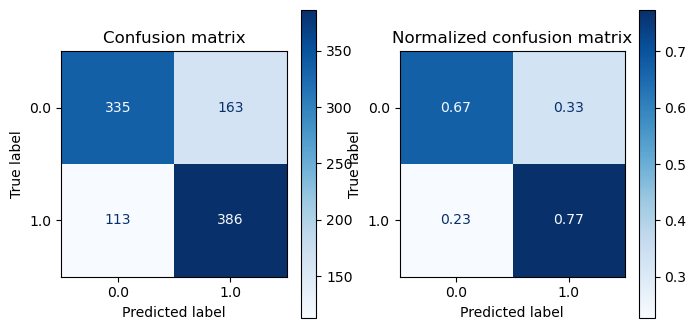

In [9]:
get_evaluation(y_test,y_pred,navie_bayes_pipeline,X_test)

In [10]:
navie_bayes_pipeline.predict(["야이 씨바라","븅시나","아이착해","넌참 좋은아이야","우와 멋지다","엿 먹어","못생겼다","병신","등신 자식"])

array([0., 1., 1., 1., 1., 1., 0., 0., 0.])

### SVM 분류

In [28]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline

# C: 하드 마진, 소프트 마진
# gamma: 하나의 훈련 샘플이 미치는 영향의 범위
param_grid = {
    'C': [5,10],
    'gamma': [1,2],
    'kernel': ['rbf']
#     'C': [5,10,15],
#     'gamma': [0.1,0.5,1,1.5],
#     [[259 239]
#  [ 69 430]]
# 정확도: 0.6911, 정밀도: 0.6428, 재현율: 0.8617, F1:0.7363, AUC:0.6909
}

# 서포트 벡터 분류
support_vector_classifier = SVC(probability=True)

# 하이퍼 파라미터 튜닝
grid_support_vector = GridSearchCV(support_vector_classifier, param_grid=param_grid, cv=3, refit=True, return_train_score=True)

sv_pipeline = Pipeline([('count_vectorizer', CountVectorizer()), ('support_vector_classifier', grid_support_vector)])
sv_pipeline.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('support_vector_classifier',
                 GridSearchCV(cv=3, estimator=SVC(probability=True),
                              param_grid={'C': [5, 10], 'gamma': [1, 2],
                                          'kernel': ['rbf']},
                              return_train_score=True))])

오차 행렬
[[341 157]
 [179 320]]
정확도: 0.6630, 정밀도: 0.6709, 재현율: 0.6413, F1:0.6557, AUC:0.6630
###########################################################################


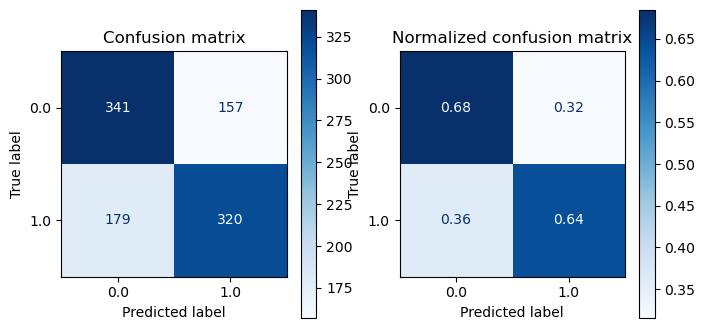

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [29]:

y_pred = sv_pipeline.predict(X_test)
get_evaluation(y_test,y_pred,sv_pipeline,X_test)
grid_support_vector.best_params_

### 결정트리 분류

In [30]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()
parameters = {'max_depth': [100000], 'min_samples_split': [4]}
grid_decision_tree_classifier = GridSearchCV(decision_tree_classifier
                                             , param_grid=parameters
                                             , cv=3
                                             , refit=True
                                             , return_train_score=True)

tree_pipeline = Pipeline([('count_vectorizer', CountVectorizer()), ('grid_decision_tree_classifier', grid_decision_tree_classifier)])
tree_pipeline.fit(X_train, y_train)


Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('grid_decision_tree_classifier',
                 GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                              param_grid={'max_depth': [100000],
                                          'min_samples_split': [4]},
                              return_train_score=True))])

오차 행렬
[[236 262]
 [ 85 414]]
정확도: 0.6520, 정밀도: 0.6124, 재현율: 0.8297, F1:0.7047, AUC:0.6518
###########################################################################


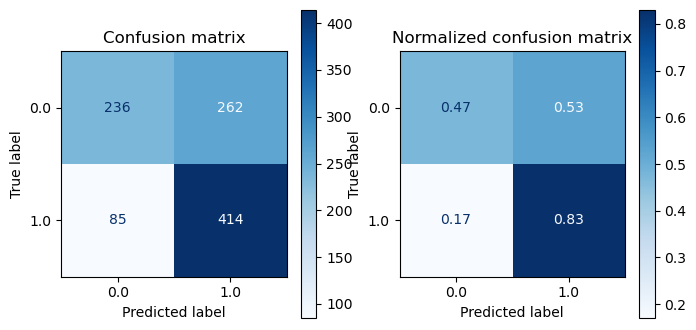

{'max_depth': 100000, 'min_samples_split': 4}

In [31]:
y_pred = tree_pipeline.predict(X_test)
get_evaluation(y_test,y_pred,tree_pipeline,X_test)
grid_decision_tree_classifier.best_params_

In [15]:
tree_pipeline.predict_proba(X_test)

array([[0.45511745, 0.54488255],
       [0.        , 1.        ],
       [0.45511745, 0.54488255],
       ...,
       [0.45511745, 0.54488255],
       [1.        , 0.        ],
       [0.45511745, 0.54488255]])